<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Airline_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Evaluating Airline Travel Safety

In [3]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 25.1MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.__version__



'0.9.0'

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv'

df = pd.read_csv(url)

'''
describe shows clean data.
  Object feature - airline, all unique object, freq 1
  All numerical features - no '?' or character in unique or top observation.

'''
df.describe(include='all')

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,56,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
unique,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ethiopian Airlines,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,NaN,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,NaN,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,NaN,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,NaN,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000


## Can you avoid bad Airline ?
Fear of flying is understandable because  air travelling, put you into an uncontrollable situation. When air plane accident crashes,  it goes into headline news. Headline news solidified people presumption of their belief. It becomes common sense to avoid airline with bad fatal accidents. 

### Strategy 1: Avoid airline with high fatalities accidents.

In [0]:
df_fatalities_99 = df.sort_values(['fatalities_85_99','fatal_accidents_85_99'], ascending=[False, False])
df_fatalities_14 = df.sort_values(['fatalities_00_14','fatal_accidents_00_14'], ascending=[False, False])

In [0]:
'''
Airline with high fatalities accidents 85-99
'''

g = sns.relplot( x='fatal_accidents_85_99', y='fatalities_85_99', hue='airline', size='fatalities_85_99', data=df_fatalities_99)
g.fig.set_size_inches(12,8)
plt.text(0,600, s='Airlines with Headline Fatalities Crashes',
        fontweight='bold', fontsize=14)
plt.text(1, 580, s='between 1985-1999.',
        fontweight='bold', fontsize=12)
plt.annotate(xy=(6.5,535), s='China Airlines');
plt.annotate(xy=(1.5,520), s='Japan Airlines');
plt.annotate(xy=(5.5,425), s='Korean Air');           
plt.annotate(xy=(12.5,407), s='Delta/Northwest')
plt.annotate(xy=(1.5,329), s='Air India');

In [0]:
'''
Airlines with high fatalities accidents 00-14
'''

g = sns.relplot( x='fatal_accidents_00_14', y='fatalities_00_14', hue='airline', size='fatalities_00_14', data=df_fatalities_14)
g.fig.set_size_inches(12,8)
plt.text(0,600, s='Airlines Fatality Crashes are rare and unhighly unpredictable',
        fontweight='bold', fontsize=14)
plt.text(1, 580, s='between 2000-2014.',
        fontweight='bold', fontsize=12)
plt.annotate(xy=(2.1,535), s='Malaysia Airlines');
plt.annotate(xy=(3.1,416), s='American');
plt.annotate(xy=(2.1,337), s='Air France');           
plt.annotate(xy=(2.1,283), s='Kenya Airways')
plt.annotate(xy=(1.1,225), s='China Airlines');

In [0]:
plt.subplot(121)
plt.scatter(x=df_fatalities_99.fatal_accidents_85_99, y=df_fatalities_99.fatalities_85_99,
           s=80)

plt.subplot(122)
plt.scatter(x=df_fatalities_14.fatal_accidents_00_14, y=df_fatalities_14.fatalities_00_14,
           s=80)


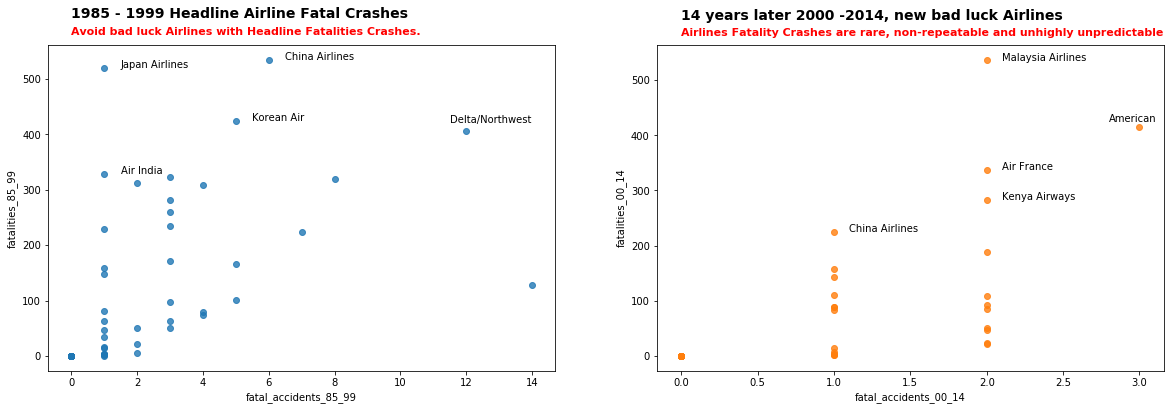

In [4]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.regplot(ax=ax1, x='fatal_accidents_85_99', y='fatalities_85_99', data=df_fatalities_99,
           fit_reg=False)
ax1.text(0,610, s='1985 - 1999 Headline Airline Fatal Crashes',
        fontweight='bold', fontsize=14)
ax1.text(0, 580, s='Avoid bad luck Airlines with Headline Fatalities Crashes.',
        fontweight='bold', fontsize=11, color='red')
ax1.annotate(xy=(6.5,535), s='China Airlines');
ax1.annotate(xy=(1.5,520), s='Japan Airlines');
ax1.annotate(xy=(5.5,425), s='Korean Air');           
ax1.annotate(xy=(11.5,420), s='Delta/Northwest')
ax1.annotate(xy=(1.5,329), s='Air India');

sns.regplot(ax=ax2, x='fatal_accidents_00_14', y='fatalities_00_14', data=df_fatalities_14,
           fit_reg=False)
ax2.text(0,610, s='14 years later 2000 -2014, new bad luck Airlines',
        fontweight='bold', fontsize=14)
ax2.text(0, 580, s='Airlines Fatality Crashes are rare, non-repeatable and unhighly unpredictable',
        fontweight='bold', fontsize=11, color='red')
ax2.annotate(xy=(2.1,535), s='Malaysia Airlines');
ax2.annotate(xy=(2.8,425), s='American');
ax2.annotate(xy=(2.1,337), s='Air France');           
ax2.annotate(xy=(2.1,283), s='Kenya Airways')
ax2.annotate(xy=(1.1,225), s='China Airlines');


## Avoid accident prone Airlines?
Airline fatalities crashes are rare and rarely happen repeatedly. Rare accidents are unpredictable. Hence avoiding airlines with bad record of high accident incidents, make better sense.

### Strategy 2: Avoid bad airline with highest bad past accident records



In [0]:
dfsort_99 = df.sort_values(['fatal_accidents_85_99','incidents_85_99'], ascending=[False,False])


### Top 7 Airlines with highest Fatal and Incident accidents during 85 - 99

In [0]:
sns.set_style('white')
g=sns.relplot( x='incidents_85_99', y='fatal_accidents_85_99', hue='airline', size='fatalities_85_99', data=dfsort_99)
g.fig.set_size_inches(12,8)
plt.text(0,16, s='Avoid Airlines with highest Fatalities and Incidents accidents',
        fontweight='bold', fontsize=11)
plt.text(1,15, s=' 1988 - 1995',
        fontweight='bold', fontsize=11)
plt.annotate(xy=(70,13.5),s='Aeroflot');
plt.text(x=20, y=11.5, s='Delta/Northwest');
plt.text(x=20.5, y=8,s='United/Continental');
plt.text(x=17, y=7,s='US Airways/America West');
plt.annotate(xy=(13,6),s='China Airlines')
            
plt.annotate(xy=(27,5),s='Ethiopian Airlines')
            
plt.annotate(xy=(21,4.9), xytext=(24,4),s='American',
            arrowprops=dict(facecolor='black'));


### 14 years later, same major Airlines had the same highest bad past accidents as before
After 14 years, followed up checking on airline with highest bad past accidents records in previous 14 years periods.

* Four out of the last top seven highest bad record holders, repeated among the new seven top bad accident airlines. The past highest bad accident airlines continued after 14 years period, were (American, Delta/Northwest, United/Continental, US Airways/America West and Ethiopian Airlines).

* The exceptions were two of the last top seven accidents airlines (Aeroflot, China Airline ) went from top to low accident airline.

### Not all repeated offenders repeat offences or are there other reasons.

* Fatalities by Airlines are rare and even rarer when happened repeatedly.  Highly unpredictable.
* Top accident airlines commonality are major airline flown in and out of major busy airport.
* Higher rate of passengers travelled and flight flown, higher rate of accident incidents



In [0]:
dfsort_14 = df.sort_values(['fatal_accidents_00_14','incidents_00_14'], ascending=[False,False])

In [0]:
sns.set_style('white')
g=sns.relplot( x='incidents_00_14', y='fatal_accidents_00_14', hue='airline', size='fatalities_00_14', data=dfsort_14)
g.fig.set_size_inches(12,8)
plt.text(0,3.5, s='Same major Airlines with highest Fatalities and Incidents accidents',
        fontweight='bold', fontsize=11)
plt.text(1.5,3.3, s='now 2000-2014 as prior between 1985-1999.',
        fontweight='bold', fontsize=11)
plt.annotate(xy=(16,2.9),s='American');
plt.annotate(xy=(24.5,2.1), s='Delta/Northwest');
plt.annotate(xy=(13.5,2.1),s='United/Continental');
plt.annotate(xy=(11,2), xytext=(11,1.8),s='US Airways/America West',
            arrowprops=dict(facecolor='black'));
plt.annotate(xy=(2,1), xytext=(1.9,1.3),s='China Airlines',
            arrowprops=dict(facecolor='black'));
plt.annotate(xy=(5,2), xytext=(4,2.2),s='Ethiopian Airlines',
            arrowprops=dict(facecolor='black'));
plt.annotate(xy=(6,1), xytext=(7,1.1),s='Aeroflot',
            arrowprops=dict(facecolor='black'));


In [311]:
dfsort_99.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
1,Aeroflot*,1197672318,76,14,128,6,1,88
19,Delta / Northwest*,6525658894,24,12,407,24,2,51
51,United / Continental*,7139291291,19,8,319,14,2,109
52,US Airways / America West*,2455687887,16,7,224,11,2,23
16,China Airlines,813216487,12,6,535,2,1,225


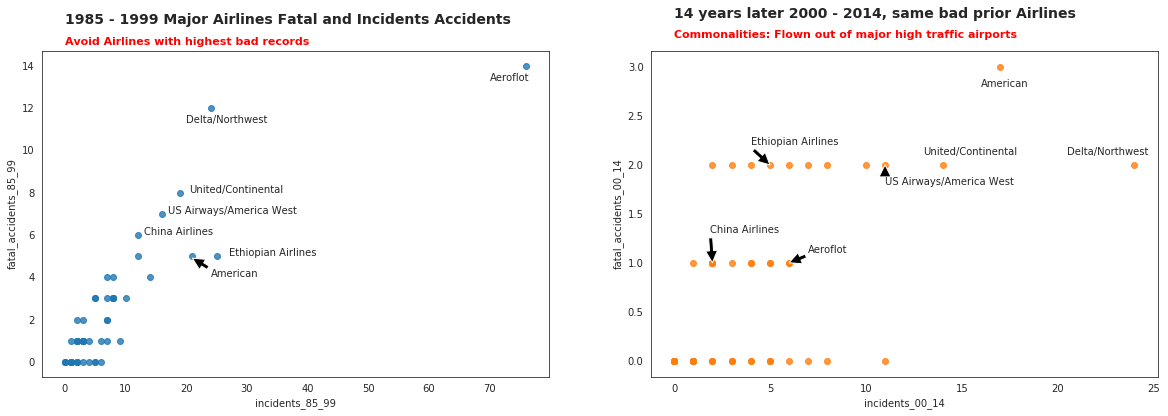

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.regplot( ax=ax1, x='incidents_85_99', y='fatal_accidents_85_99', data=dfsort_99,
           fit_reg=False)
ax1.text(0,16, s='1985 - 1999 Major Airlines Fatal and Incidents Accidents',
        fontweight='bold', fontsize=14)
ax1.text(0,15, s='Avoid Airlines with highest bad records',
        fontweight='bold', fontsize=11, color='red')
ax1.annotate(xy=(70,13.3),s='Aeroflot');
ax1.text(x=20, y=11.3, s='Delta/Northwest');
ax1.text(x=20.5, y=8,s='United/Continental');
ax1.text(x=17, y=7,s='US Airways/America West');
ax1.annotate(xy=(13,6),s='China Airlines')         
ax1.annotate(xy=(27,5),s='Ethiopian Airlines')         
ax1.annotate(xy=(21,4.9), xytext=(24,4),s='American',
            arrowprops=dict(facecolor='black'));

sns.regplot( ax=ax2, x='incidents_00_14', y='fatal_accidents_00_14', data=dfsort_14,
           fit_reg=False)
ax2.text(0,3.5, s='14 years later 2000 - 2014, same bad prior Airlines',
        fontweight='bold', fontsize=14)
ax2.text(0,3.3, s='Commonalities: Flown out of major high traffic airports',
        fontweight='bold', fontsize=11, color='red')
ax2.annotate(xy=(16,2.8),s='American');
ax2.annotate(xy=(20.5,2.1), s='Delta/Northwest');
ax2.annotate(xy=(13,2.1),s='United/Continental');
ax2.annotate(xy=(11,2), xytext=(11,1.8),s='US Airways/America West',
            arrowprops=dict(facecolor='black'));
ax2.annotate(xy=(2,1), xytext=(1.9,1.3),s='China Airlines',
            arrowprops=dict(facecolor='black'));
ax2.annotate(xy=(5,2), xytext=(4,2.2),s='Ethiopian Airlines',
            arrowprops=dict(facecolor='black'));
ax2.annotate(xy=(6,1), xytext=(7,1.1),s='Aeroflot',
            arrowprops=dict(facecolor='black'));



### Normalize data and then compare
Let’s combine the three measures of crash rates — incidents, fatal accidents and fatalities — into a single measure and call it as airline’s safety score. Calculate it as follows:

For each category, subtract an airline’s crash rate from the average for all airlines since 1985. This gives safer airlines positive scores and less safe airlines negative scores.

Multiply the result by the square root of the number of seat kilometers flown. This gives more credit to an airline that has achieved a strong safety record over a larger sample of flights.

Standardize the score in each category to calculate how many standard deviations an airline is above or below the mean. Then average the scores from the three categories together. This is the safety score.

### Normalize all accidents by avail seat per km per week for 1985-1999

In [9]:
'''
Extracting incident using loc
'''
df1 = df.loc[:,['airline','avail_seat_km_per_week','incidents_85_99','fatal_accidents_85_99','fatalities_85_99']]
df1.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99
0,Aer Lingus,320906734,2,0,0
1,Aeroflot*,1197672318,76,14,128
2,Aerolineas Argentinas,385803648,6,0,0
3,Aeromexico*,596871813,3,1,64
4,Air Canada,1865253802,2,0,0


In [10]:
'''
Calculate the mean, then normalized accidents by avail seat 
'''
incident_mean = df1.incidents_85_99.mean()
fatal_accidents_mean = df1.fatal_accidents_85_99.mean()
fatal_mean = df1.fatalities_85_99.mean()
df1['incidents_85_99'] =  ((incident_mean - df1.incidents_85_99 ) * (df1.avail_seat_km_per_week **0.5)) 
df1['fatal_accidents_85_99'] =  ((fatal_accidents_mean - df1.fatal_accidents_85_99 ) * (df1.avail_seat_km_per_week **0.5)) 
df1['fatalities_85_99'] =  ((fatal_mean - df1.fatalities_85_99 ) * (df1.avail_seat_km_per_week **0.5)) 
df1.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99
0,Aer Lingus,320906734,9.276825e+04,39026.645091,2.013711e+06
1,Aeroflot*,1197672318,-2.381731e+06,-409108.938439,-5.395047e+05
2,Aerolineas Argentinas,385803648,2.314936e+04,42791.249556,2.207958e+06
3,Aeromexico*,596871813,1.020865e+05,28793.631585,1.182720e+06
4,Air Canada,1865253802,2.236552e+05,94089.415498,4.854860e+06


In [12]:
'''
Compare old mean and new mean to check for error
'''
normalized_incident_mean = df1.incidents_85_99.mean()
normalized_fatal_accidents_mean = df1.fatal_accidents_85_99.mean()
normalized_fatalities_mean = df1.fatalities_85_99.mean()
print('incident mean {} and new mean {}'.format(incident_mean, normalized_incident_mean))
print('fatal accident mean {} and new mean {}'.format(fatal_accidents_mean, normalized_fatal_accidents_mean))
print('fatalities mean {} and new mean {}'.format(fatal_mean, normalized_fatalities_mean))

incident mean 7.178571428571429 and new mean -47134.767180689145
fatal accident mean 2.1785714285714284 and new mean -19272.258294015908
fatalities mean 112.41071428571429 and new mean -461939.394201175


In [13]:
'''
Calculate accident deviation from mean
'''
df1['incident_var'] = df1.incidents_85_99 / (normalized_incident_mean)
df1['fatal_accidents_var'] = df1.fatal_accidents_85_99 / (normalized_fatal_accidents_mean)
df1['fatalities_var'] = df1.fatalities_85_99 / (normalized_fatalities_mean)
df1['safety_score'] = (df1.incident_var + df1.fatal_accidents_var + df1.fatalities_var)/3
df1.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incident_var,fatal_accidents_var,fatalities_var,safety_score
0,Aer Lingus,320906734,9.276825e+04,39026.645091,2.013711e+06,-1.968149,-2.025017,-4.359253,-2.784140
1,Aeroflot*,1197672318,-2.381731e+06,-409108.938439,-5.395047e+05,50.530236,21.227867,1.167912,24.308672
2,Aerolineas Argentinas,385803648,2.314936e+04,42791.249556,2.207958e+06,-0.491131,-2.220355,-4.779758,-2.497081
3,Aeromexico*,596871813,1.020865e+05,28793.631585,1.182720e+06,-2.165843,-1.494046,-2.560336,-2.073408
4,Air Canada,1865253802,2.236552e+05,94089.415498,4.854860e+06,-4.745015,-4.882117,-10.509733,-6.712288


### Normalize accidents by avail seat per km per week for 2000-2014

In [16]:
df2 = df.loc[:,['airline','avail_seat_km_per_week','incidents_00_14','fatal_accidents_00_14','fatalities_00_14']]
df2.head()

,airline,avail_seat_km_per_week,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,0,0,0
1,Aeroflot*,1197672318,6,1,88
2,Aerolineas Argentinas,385803648,1,0,0
3,Aeromexico*,596871813,5,0,0
4,Air Canada,1865253802,2,0,0


In [17]:
'''
Calculate the mean, then normalized accidents by avail seat 
'''
incident_mean = df2.incidents_00_14.mean()
fatal_accidents_mean = df2.fatal_accidents_00_14.mean()
fatal_mean = df2.fatalities_00_14.mean()
df2['incidents_00_14'] =  ((incident_mean - df2.incidents_00_14 ) * (df2.avail_seat_km_per_week **0.5)) 
df2['fatal_accidents_00_14'] =  ((fatal_accidents_mean - df2.fatal_accidents_00_14 ) * (df2.avail_seat_km_per_week **0.5)) 
df2['fatalities_00_14'] =  ((fatal_mean - df2.fatalities_00_14 ) * (df2.avail_seat_km_per_week **0.5)) 
df2.head()

,airline,avail_seat_km_per_week,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,73894.713246,11835.949741,9.945397e+05
1,Aeroflot*,1197672318,-64888.879964,-11741.797327,-1.124123e+06
2,Aerolineas Argentinas,385803648,61380.890756,12977.674046,1.090475e+06
3,Aeromexico*,596871813,-21377.090116,16141.884373,1.356355e+06
4,Air Canada,1865253802,91775.741346,28535.314536,2.397738e+06


In [18]:
'''
Calculate accident deviation from mean
'''
df2['incident_var'] = df2.incidents_00_14 / (normalized_incident_mean)
df2['fatal_accidents_var'] = df2.fatal_accidents_00_14 / (normalized_fatal_accidents_mean)
df2['fatalities_var'] = df2.fatalities_00_14 / (normalized_fatalities_mean)
df2['safety_score'] = (df2.incident_var + df2.fatal_accidents_var + df2.fatalities_var)/3
df2.head()

,airline,avail_seat_km_per_week,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incident_var,fatal_accidents_var,fatalities_var,safety_score
0,Aer Lingus,320906734,73894.713246,11835.949741,9.945397e+05,-1.567733,-0.614144,-2.152966,-1.444948
1,Aeroflot*,1197672318,-64888.879964,-11741.797327,-1.124123e+06,1.376667,0.609259,2.433485,1.473137
2,Aerolineas Argentinas,385803648,61380.890756,12977.674046,1.090475e+06,-1.302242,-0.673386,-2.360646,-1.445425
3,Aeromexico*,596871813,-21377.090116,16141.884373,1.356355e+06,0.453531,-0.837571,-2.936218,-1.106752
4,Air Canada,1865253802,91775.741346,28535.314536,2.397738e+06,-1.947092,-1.480642,-5.190589,-2.872774


In [69]:
'''
Airline Safety Index between 85-99 and 00-14
'''
safety_index = df1.loc[:, ['airline']]
safety_index['safety_85_99'] = df1.loc[:, 'safety_score']
safety_index['safety_00_14'] = df2.loc[:,'safety_score']
safety_index = safety_index[safety_index.safety_85_99 < 0]
safety_index = safety_index[safety_index.safety_00_14 <0]

safety_index.sort_values(['safety_85_99', 'safety_00_14']).head(8)


,airline,safety_85_99,safety_00_14
43,Southwest Airlines,-9.301083,-1.378675
15,Cathay Pacific*,-8.616783,-3.380254
14,British Airways*,-7.966367,-2.155726
37,Qantas*,-7.115188,-1.983671
4,Air Canada,-6.712288,-2.872774
33,Lufthansa*,-6.344850,-3.479710
10,All Nippon Airways,-5.592348,-1.336951
54,Virgin Atlantic,-5.151853,-2.557404


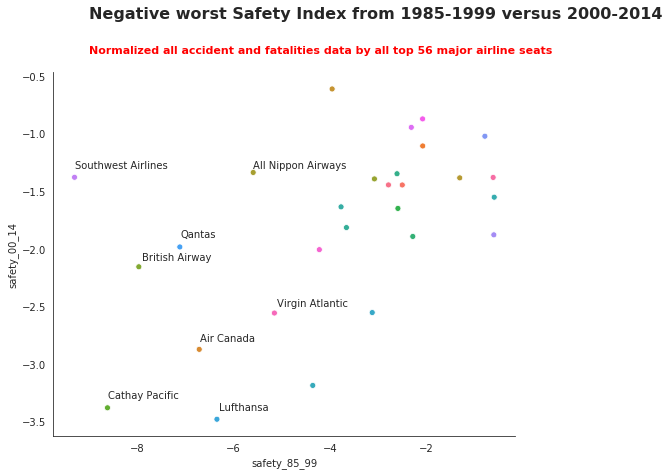

In [71]:
g=sns.relplot(x='safety_85_99', y='safety_00_14', hue='airline', legend=False, data=safety_index)
g.fig.set_size_inches(8,6);

plt.text(-9,0, s='Negative worst Safety Index from 1985-1999 versus 2000-2014',
        fontweight='bold', fontsize=16)
plt.text(-9,-0.3, s='Normalized all accident and fatalities data by all top 56 major airline seats',
        fontweight='bold', fontsize=11, color='red')
plt.annotate(xy=(-9.3,-1.3),s='Southwest Airlines');
plt.annotate(xy=(-8.6,-3.3), s='Cathay Pacific');
plt.annotate(xy=(-7.9, -2.1),s='British Airway');
plt.annotate(xy=(-7.1,-1.9), s='Qantas')
plt.annotate(xy=(-6.7,-2.8), s='Air Canada');
plt.annotate(xy=(-6.3,-3.4), s='Lufthansa');
plt.annotate(xy=(-5.6,-1.3), s='All Nippon Airways');
plt.annotate(xy=(-5.1,-2.5), s='Virgin Atlantic');
            

In [35]:
'''
Assign safety score to df main table
'''
safety_85_99 = df1.loc[:,['airline','safety_score']]
safety_00_14 = df2.loc[:, ['airline','safety_score']]
safety_85_99.head()

,airline,safety_score
0,Aer Lingus,-2.784140
1,Aeroflot*,24.308672
2,Aerolineas Argentinas,-2.497081
3,Aeromexico*,-2.073408
4,Air Canada,-6.712288


In [36]:
safety_85_99 = safety_85_99.sort_values('safety_score').head()
safety_85_99

,airline,safety_score
43,Southwest Airlines,-9.301083
15,Cathay Pacific*,-8.616783
14,British Airways*,-7.966367
37,Qantas*,-7.115188
4,Air Canada,-6.712288


In [37]:
safety_85_99.reset_index()

,index,airline,safety_score
0,43,Southwest Airlines,-9.301083
1,15,Cathay Pacific*,-8.616783
2,14,British Airways*,-7.966367
3,37,Qantas*,-7.115188
4,4,Air Canada,-6.712288


In [46]:
'''
Airlines with worst safety score 85-99
'''
safety_85_99 = safety_85_99.sort_values('safety_score').head()
#safety_85_99['safety_score'] = abs(safety_85_99.safety_score)
safety_85_99['color'] = ['Red','Green','Green','Green','Green']
safety_85_99

,index,airline,safety_score,color
0,43,Southwest Airlines,-9.301083,Red
1,15,Cathay Pacific*,-8.616783,Green
2,14,British Airways*,-7.966367,Green
3,37,Qantas*,-7.115188,Green
4,4,Air Canada,-6.712288,Green


In [45]:
safety_85_99

,index,airline,safety_score,color
0,43,Southwest Airlines,-9.301083,Red
1,15,Cathay Pacific*,-8.616783,Green
2,14,British Airways*,-7.966367,Green
3,37,Qantas*,-7.115188,Green
4,4,Air Canada,-6.712288,Green


In [41]:
'''
Airlines with worst safety score 00-14
'''
safety_00_14 = safety_00_14.sort_values('safety_score').head()
#safety_00_14['safety_score'] = abs(safety_00_14.safety_score)
safety_00_14['color'] = ['Red','Green','Green','Green','Green']
safety_00_14

,airline,safety_score,color
33,Lufthansa*,-3.479710,Red
15,Cathay Pacific*,-3.380254,Green
28,Japan Airlines,-3.200332,Green
30,KLM*,-3.186121,Green
31,Korean Air,-3.064801,Green


### Airlines Safety is unpredictable. 

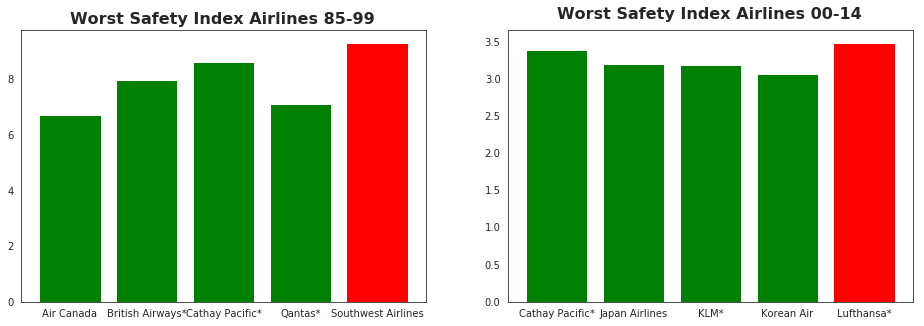

In [42]:


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.bar(safety_85_99.airline, abs(safety_85_99.safety_score), color=safety_85_99.color)
ax1.text(x=0,y=10,s='Worst Safety Index Airlines 85-99',
        fontsize=16, fontweight='bold')

ax2.bar(safety_00_14.airline, abs(safety_00_14.safety_score), color=safety_00_14.color)
ax2.text(x=0,y=3.8,s='Worst Safety Index Airlines 00-14',
        fontsize=16, fontweight='bold');



In [224]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(*args, **kwargs)
    Make a bar plot.
    
    Call signatures::
    
       bar(x, height, *, align='center', **kwargs)
       bar(x, height, width, *, align='center', **kwargs)
       bar(x, height, width, bottom, *, align='center', **kwargs)
    
    Make a bar plot with rectangles bounded by
    
    .. math::
    
       (x - width/2, x + width/2, bottom, bottom + height)
    
    (left, right, bottom and top edges) by default.  *x*,
    *height*, *width*, and *bottom* can be either scalars or
    sequences.
    
    The *align* and *orientation* kwargs control the interpretation of *x*
    and *bottom*
    
    The *align* keyword-only argument controls if *x* is interpreted
    as the center or the left edge of the rectangle.
    
    Parameters
    ----------
    x : sequence of scalars
        the x coordinates of the bars.
    
        *align* controls if *x* is the bar center (default) or
        left edge.
    
    heig